In [73]:
import util
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [74]:
file_name = "../data/commit_timestamps/assorted.csv"
lines = [line.rstrip('\n') for line in open(file_name)]
lines = lines[1:]

In [75]:
ts = {}
for line in lines:
    val = line.split( "," )
    if val[0] in ts.keys():
        ts[ val[0] ].append( val[1] )
    else:
        ts[ val[0] ] = [ val[1] ]

In [76]:
for key in ts.keys():
    print( key, len( ts[key] ) )

('d3/d3-dsv', 109)
('Microsoft/vscode-wordcount', 25)
('d3/d3-format', 302)
('d3/d3-timer', 127)
('d3/d3-random', 70)
('d3/d3-force', 218)
('Microsoft/vscode-textmate', 196)
('twbs/bootstrap-server', 39)
('d3/d3-xhr', 120)
('d3/d3-plugins', 653)
('apple/swift-protobuf', 1542)
('d3/d3-axis', 103)
('d3/d3-request', 120)
('d3/d3-ease', 134)
('twbs/bootstrap-rubygem', 1116)
('d3/d3-shape', 398)
('Microsoft/vscode-filewatcher-windows', 5)
('d3/d3-time', 169)
('apple/swift-corelibs-libdispatch', 914)
('Microsoft/vscode-htmltagwrap', 57)
('d3/d3-require', 65)
('d3/d3-time-format', 153)
('Microsoft/vscode-MDTools', 39)
('twbs/bootstrap', 17680)
('d3/d3-dispatch', 87)
('d3/d3-queue', 168)
('apple/swift-corelibs-foundation', 3477)
('apple/swift-package-manager', 3562)
('Microsoft/vscode-loader', 86)
('d3/d3-selection-multi', 48)
('Microsoft/vscode-spell-check', 89)
('tensorflow/tensorflow', 32316)
('d3/d3-quadtree', 158)
('Microsoft/vscode-mono-debug', 250)
('twbs/bootstrap-sass', 1009)
('Micros

In [77]:
valid_keys = ["apple/swift", "d3/d3", "facebook/react",
              'tensorflow/tensorflow', 'twbs/bootstrap',
              'Microsoft/vscode', 'facebook/react',
              'angular/angular.js']
for key in valid_keys:
    print( key, len( ts[key] ) )

('apple/swift', 69296)
('d3/d3', 4138)
('facebook/react', 9828)
('tensorflow/tensorflow', 32316)
('twbs/bootstrap', 17680)
('Microsoft/vscode', 32837)
('facebook/react', 9828)
('angular/angular.js', 8765)


In [78]:
FMT = "%Y-%m-%d"
ts_intvl_lst = {}
for key in valid_keys:
    temp_arr = []
    for i in range(1, len( ts[key] ) ):
        curr = ts[key][i].split(" ")[0]
        prev = ts[key][i-1].split(" ")[0]
        if curr == prev:
            continue
        diff = datetime.strptime(curr, FMT) - datetime.strptime(prev, FMT)
        temp_arr.append( diff.days )
    ts_intvl_lst[key] = temp_arr
# print( ts_intvl_lst )

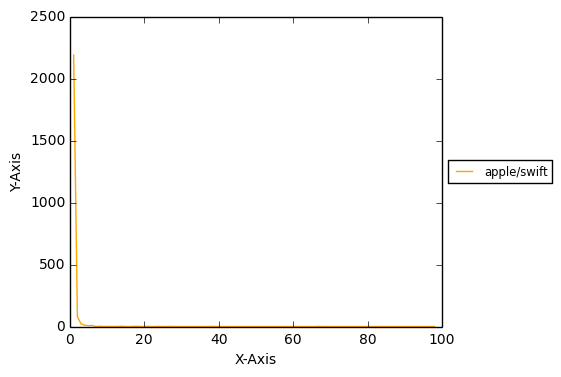

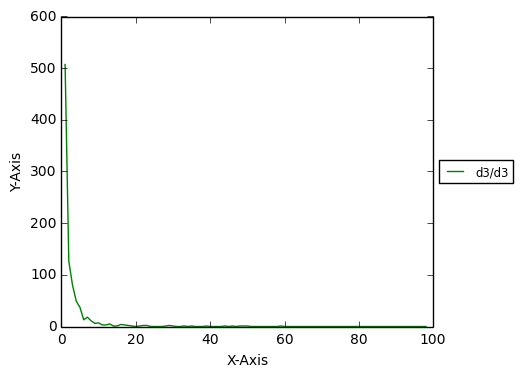

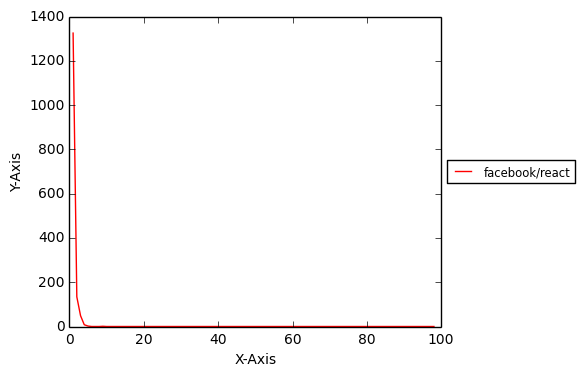

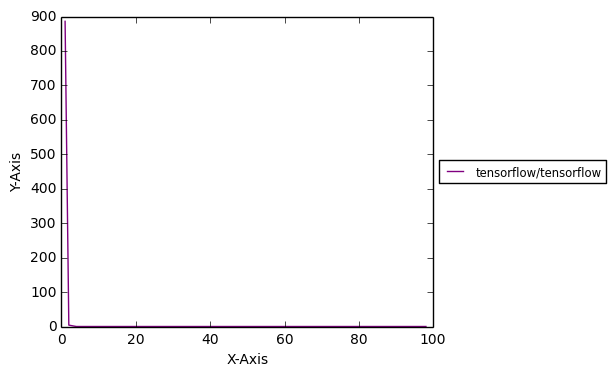

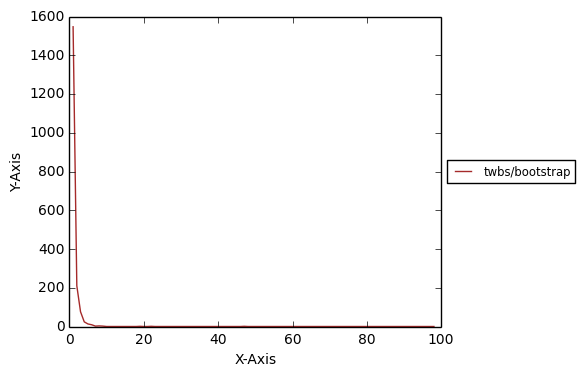

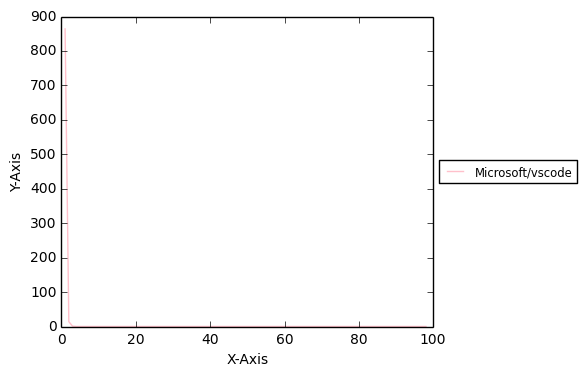

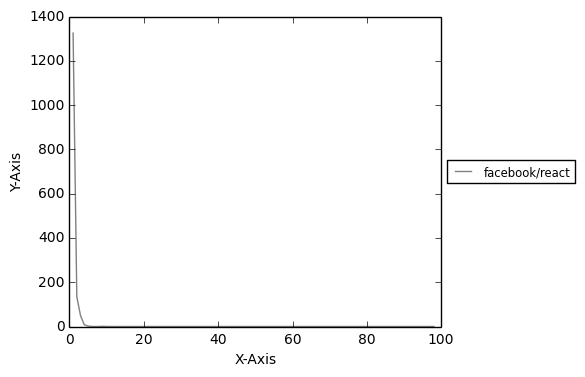

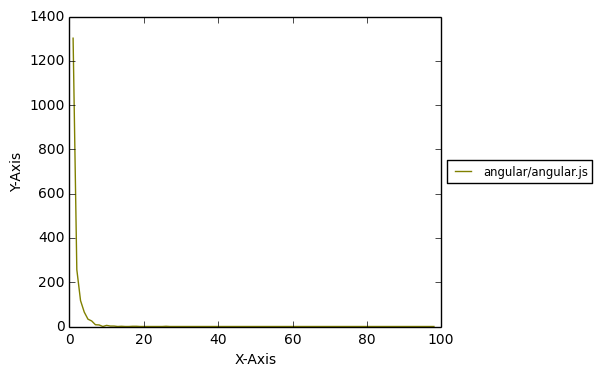

In [85]:
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
counter = 1
for key in valid_keys:
    [c, ranges] = np.histogram( ts_intvl_lst[key], bins=range(1,100) )
    plot = util.getYPlotObj(c, "line", key, colors[counter])
    plots.append( plot )
    counter += 1
    util.plot_graph(range(1,99), [plot], showLegend=True)


# 